In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
reference_image_path_Salon = './Salon/Reference.jpg'
reference_image_path_Cuisine = './Cuisine/Reference.jpg'
reference_image_path_Chambre = './Chambre/Reference.jpg'
list_of_image_paths_Salon = ['./Salon/IMG_6551.jpg', './Salon/IMG_6552.jpg','./Salon/IMG_6553.jpg','./Salon/IMG_6554.jpg','./Salon/IMG_6555.jpg','./Salon/IMG_6556.jpg','./Salon/IMG_6557.jpg','./Salon/IMG_6558.jpg','./Salon/IMG_6559.jpg','./Salon/IMG_6560.jpg']
list_of_image_paths_Cuisine = ['./Cuisine/IMG_6562.jpg', './Cuisine/IMG_6563.jpg','./Cuisine/IMG_6564.jpg','./Cuisine/IMG_6565.jpg']
list_of_image_paths_Chambre = ['./Chambre/IMG_6567.jpg','./Chambre/IMG_6568.jpg','./Chambre/IMG_6568.jpg','./Chambre/IMG_6569.jpg','./Chambre/IMG_6570.jpg','./Chambre/IMG_6571.jpg','./Chambre/IMG_6572.jpg','./Chambre/IMG_6573.jpg']

In [3]:
img_ref = cv2.imread(reference_image_path_Cuisine)
img_changes = [cv2.imread(img_path) for img_path in list_of_image_paths_Cuisine]

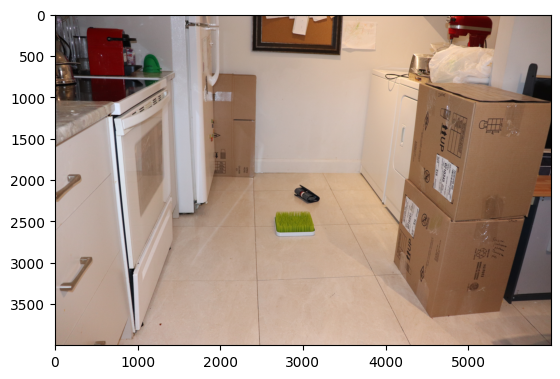

In [4]:
#Image de base

img_ref_rgb = cv2.cvtColor(img_ref, cv2.COLOR_BGR2RGB)
img_change_rgb = cv2.cvtColor(img_changes[0], cv2.COLOR_BGR2RGB)

plt.imshow(img_ref_rgb)
plt.imshow(img_change_rgb)

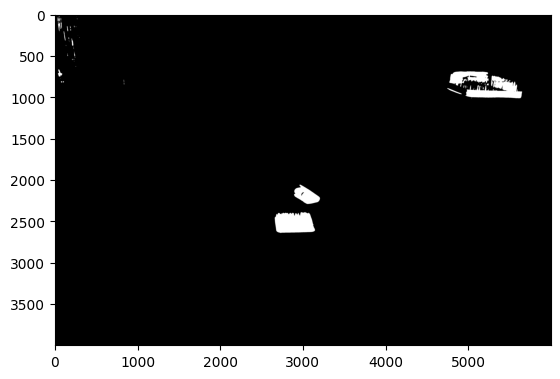

In [5]:
img_diffs = [cv2.absdiff(img_ref, img) for img in img_changes]

# Image en niveau de gris
gray_img_ref = cv2.cvtColor(img_ref, cv2.COLOR_BGR2GRAY)
gray_img_change = cv2.cvtColor(img_changes[0], cv2.COLOR_BGR2GRAY)
gray_diff = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in img_diffs]

# Histogramme gray
hist_ref = cv2.calcHist([gray_img_ref], [0], None, [256], [0, 256])
hist_change = cv2.calcHist([gray_img_change], [0], None, [256], [0, 256])
#hist_diff = cv2.calcHist([gray_diff], [0], None, [256], [0, 256])

gray_img_blurred_ref = cv2.GaussianBlur(gray_img_ref, (25, 25), 0)
gray_img_blurred_change = cv2.GaussianBlur(gray_img_change, (25, 25), 0)
gray_blurred_diff = [cv2.GaussianBlur(img, (25, 25), 0) for img in gray_diff]

# Histogramme blurred
hist_blurred_ref = cv2.calcHist([gray_img_blurred_ref], [0], None, [256], [0, 256])
hist_blurred_change = cv2.calcHist([gray_img_blurred_change], [0], None, [256], [0, 256])

# Binarisation otsu
ret0, thresh_img_ref = cv2.threshold(gray_img_ref, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret1, threshB_img_ref = cv2.threshold(gray_img_blurred_ref, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret2, thresh_img_change = cv2.threshold(gray_img_change, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret3, threshB_img_change = cv2.threshold(gray_img_blurred_change, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

_, img_thresholds = zip(*[cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) for img in gray_blurred_diff])

# Plot all the images:
thresh_diffA = cv2.cvtColor(img_thresholds[0], cv2.COLOR_BGR2RGB)
plt.imshow(thresh_diffA)



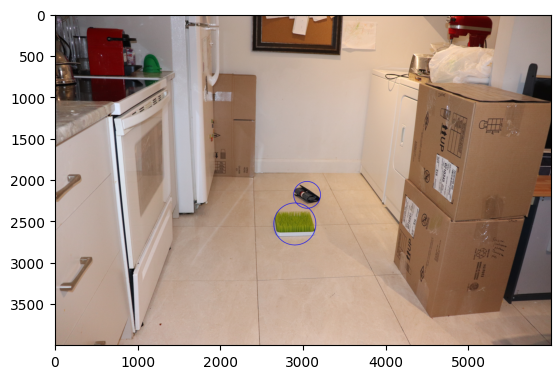

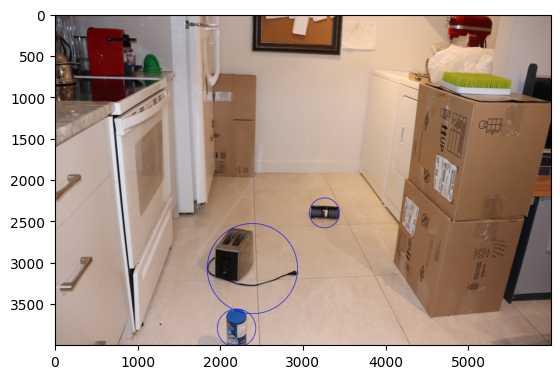

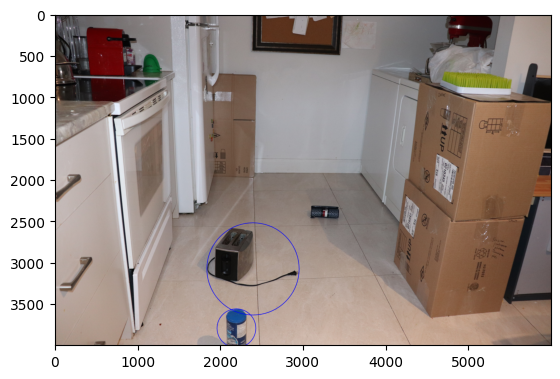

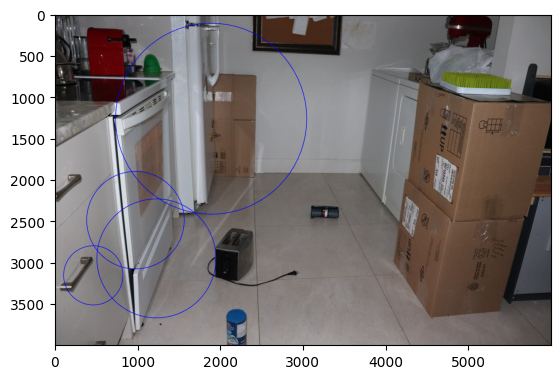

In [8]:
contours_list = [cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0] for img in img_thresholds]



hauteur_image = img_ref.shape[0]  # Obtenez la hauteur de l'image
limite_hauteur = hauteur_image / 2  # La moitié de la hauteur de l'image
taille_minimale = 40000
taille_max =1000000
c=0

# Parcourir tous les contours détectés
for idx, contours in enumerate(contours_list):
    # Copier l'image d'origine pour dessiner dessus
    img_with_circles = img_changes[idx].copy()

    # Parcourir tous les contours détectés pour cette image
    for contour in contours:
        (x, y), radius = cv2.minEnclosingCircle(contour)
        center = (int(x), int(y))
        radius = int(radius)

        # Vérifier si le contour est en dessous de la moitié de la hauteur de l'image
        # et s'il a une taille minimale requise
        if y + radius > limite_hauteur and cv2.contourArea(contour) > taille_minimale and cv2.contourArea(contour) < taille_max:
            # Dessiner un cercle englobant pour chaque contour qui répond aux critères
            cv2.circle(img_with_circles, center, radius, (255, 0, 0), 5)
            c=c+1
    img_with_circlesA = cv2.cvtColor(img_with_circles, cv2.COLOR_BGR2RGB)
    plt.imshow(img_with_circlesA)
    plt.show()
        
        
        